<a href="https://colab.research.google.com/github/sujeongzoe/KDT/blob/main/%5BDiabetes%5D_230412_230413.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 당뇨병 여부 판단
## 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터
## 보통 당뇨의 원인으로는 식습관과 유전.
## 피마 지역은 고립되어 인디언 고유의 혈통이 지속돼 왔으나 20세기 후반에 들어서면서 서구화된 식습관으로 당뇨 환자가 생김.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/diabetes.csv')
print(data.shape)

(768, 9)


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

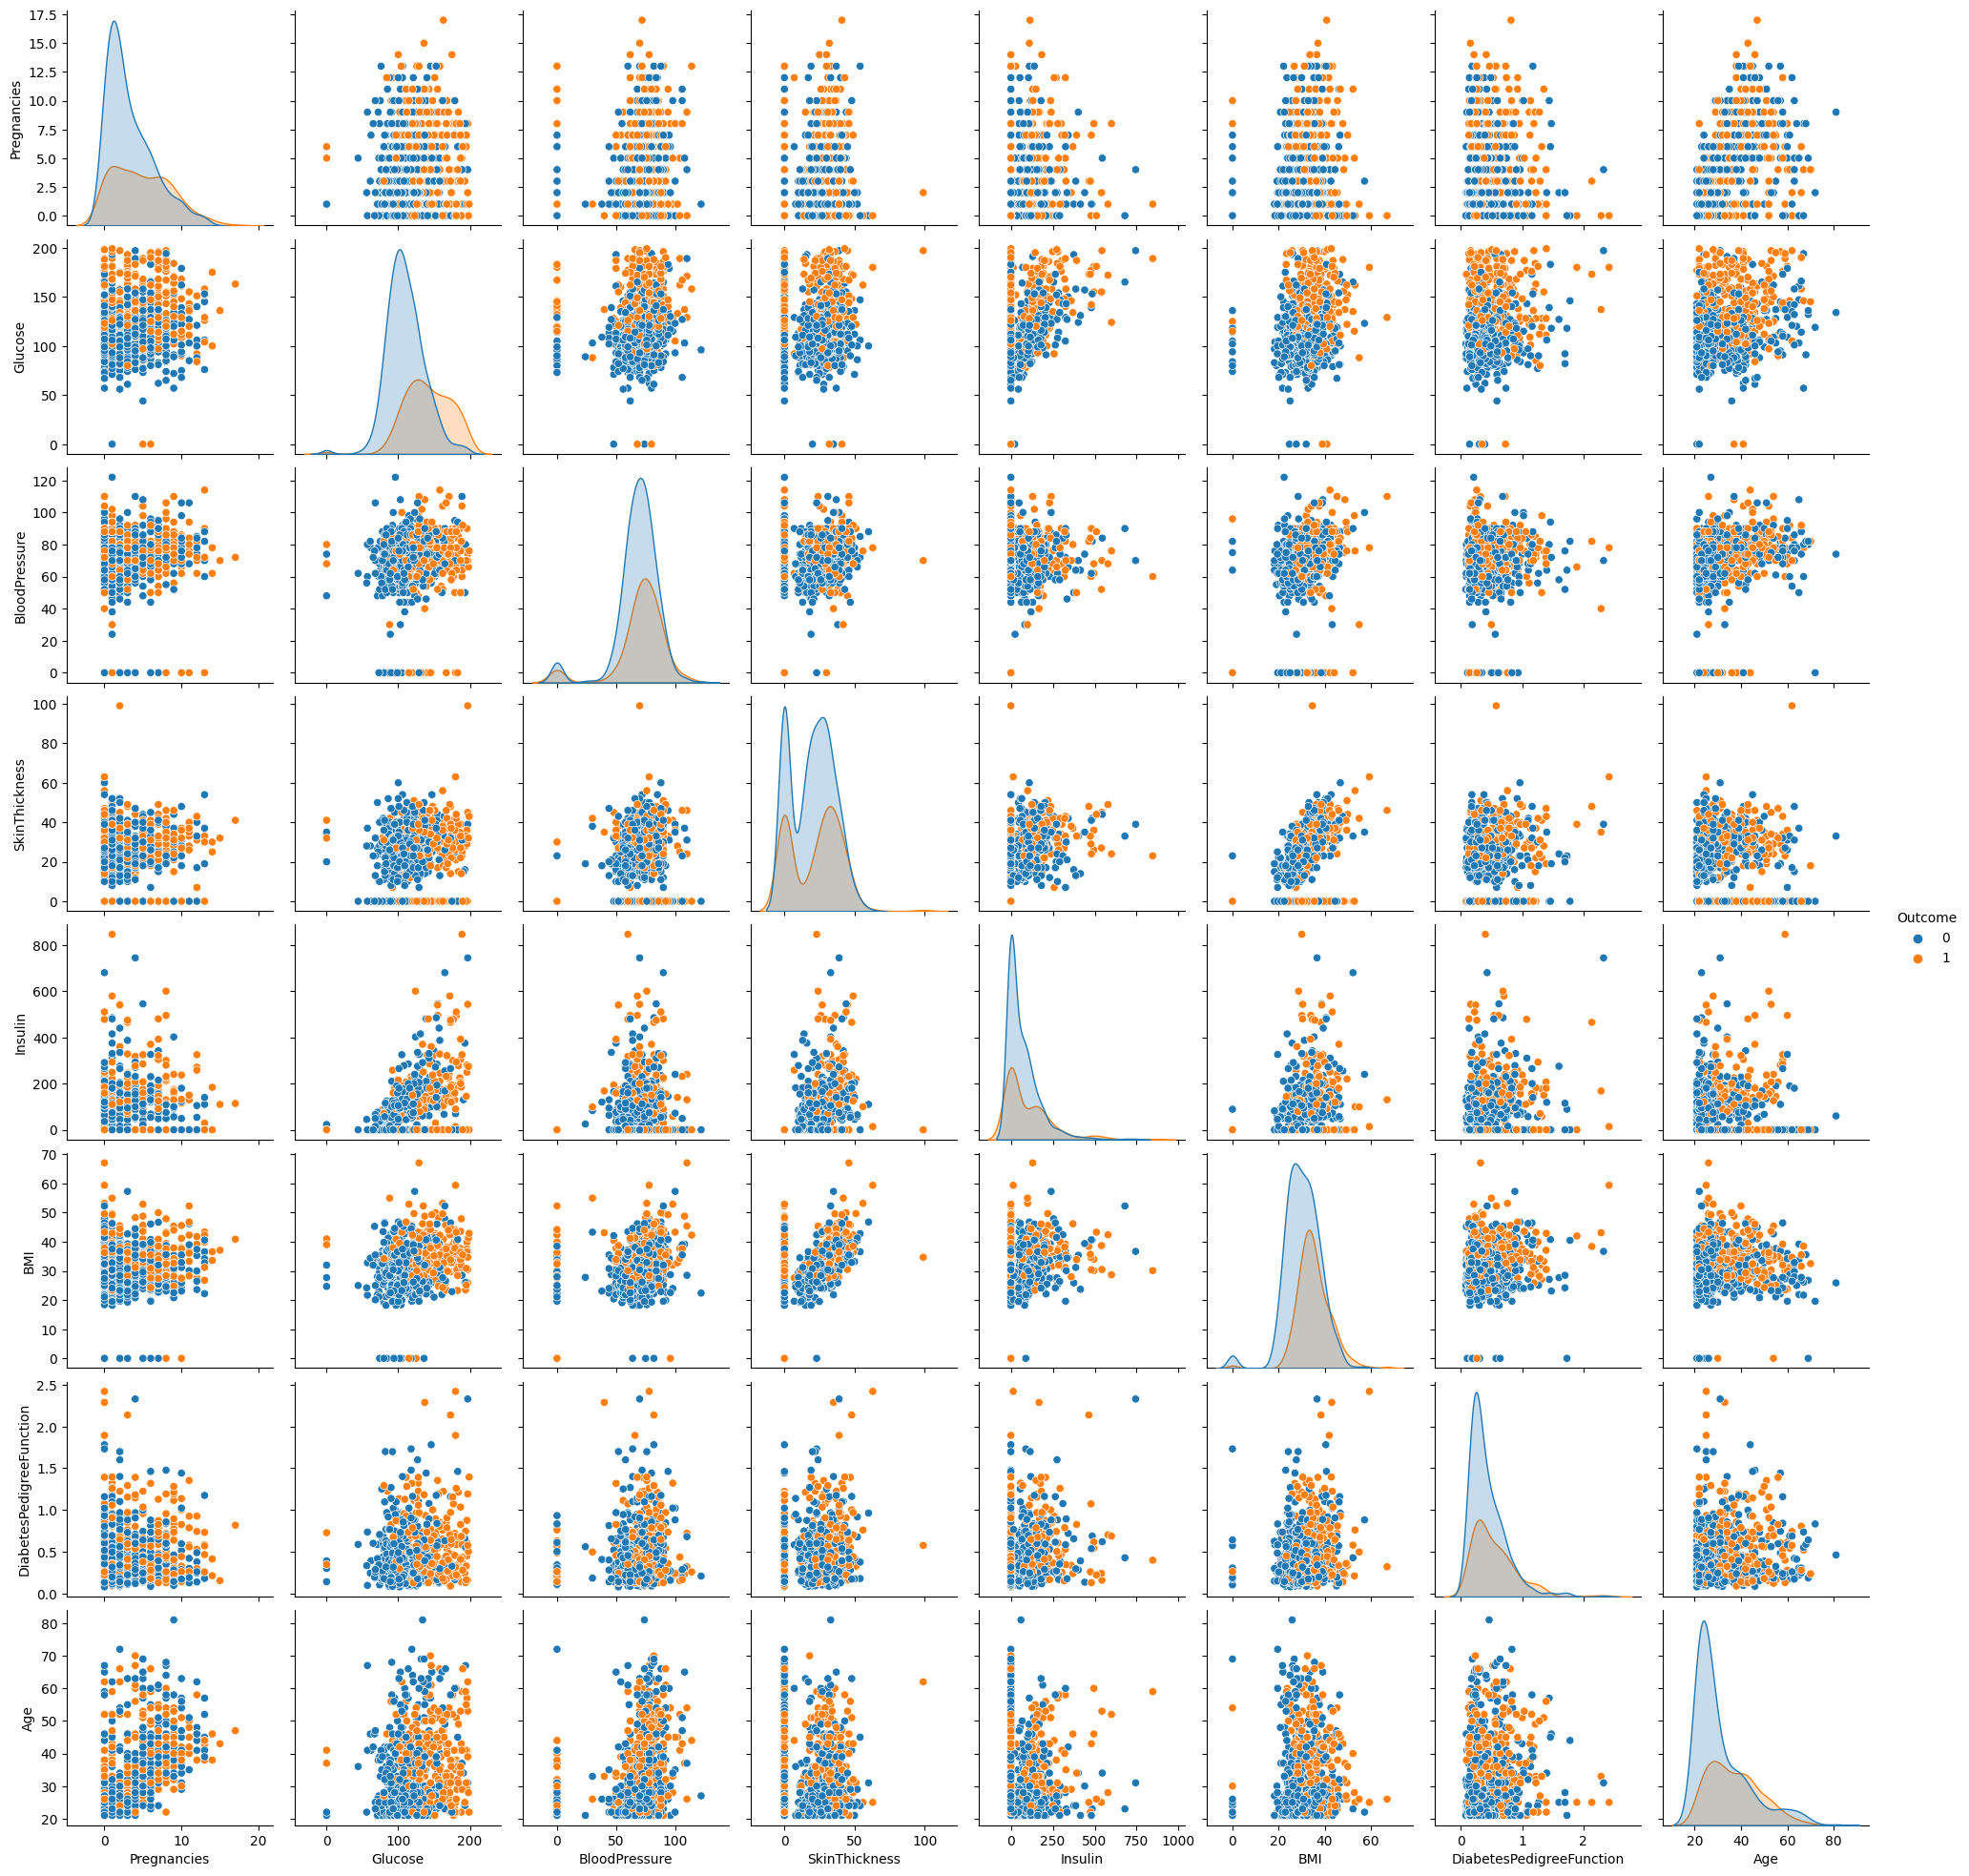

In [ ]:
import seaborn as sns

sns.pairplot(data, hue='Outcome')

- 데이터 전처리 후 split? vs split 후 전처리?
- : 정규화나 로그를 취하는 경우는 train과 test에 동일하게 적용해야 해서 전처리 후 split 해야하지만, 이상치를 제거하는 경우는 개발자가 선택한다.

In [ ]:
data[data['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [ ]:
data[data['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [ ]:
data[data['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

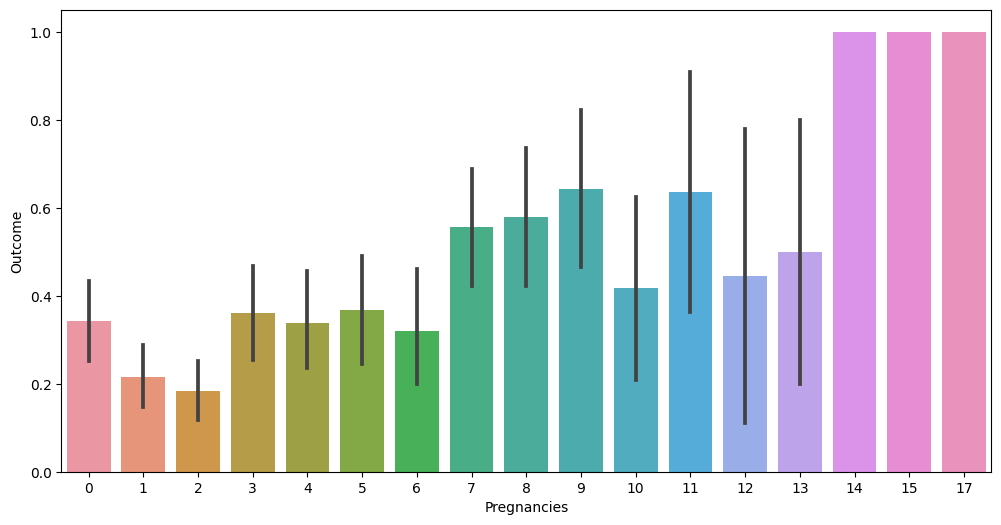

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Pregnancies',y = 'Outcome',data=data)     # target에 영향을 적게 미칠 것이라고 예상할 수 있다.

<Axes: xlabel='Outcome', ylabel='Glucose'>

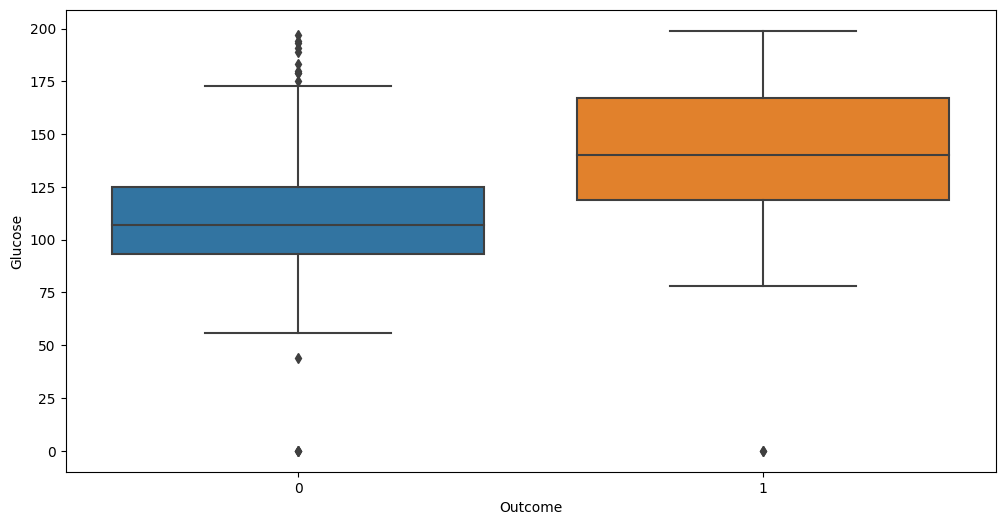

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Outcome',y = 'Glucose',data=data)

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

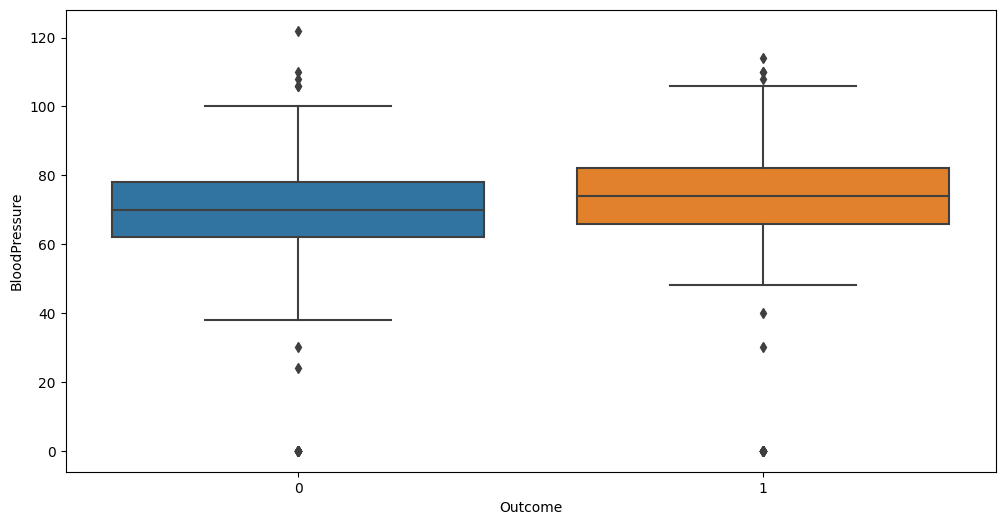

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Outcome',y = 'BloodPressure',data=data)

<Axes: xlabel='Outcome', ylabel='SkinThickness'>

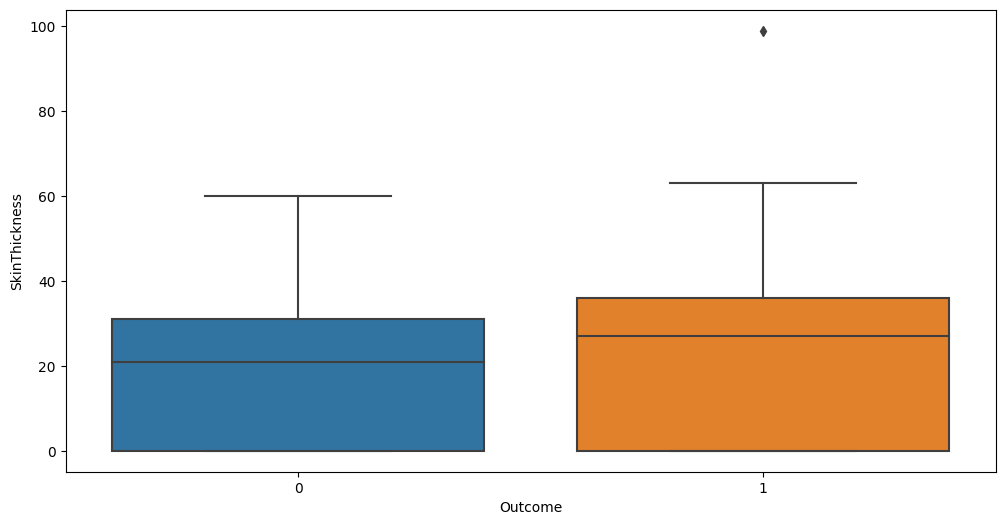

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Outcome',y = 'SkinThickness',data=data)

<Axes: xlabel='Outcome', ylabel='Insulin'>

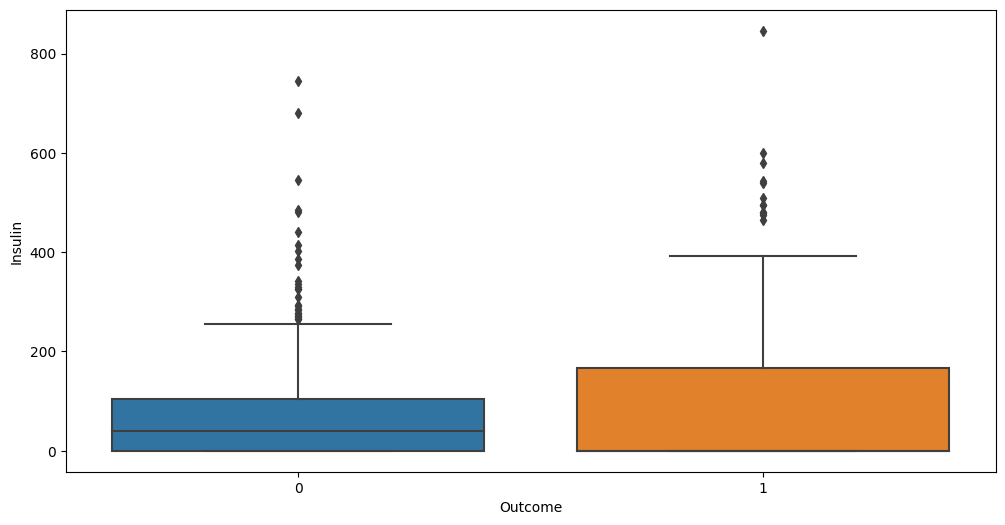

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Outcome',y = 'Insulin',data=data)

<Axes: xlabel='Outcome', ylabel='BMI'>

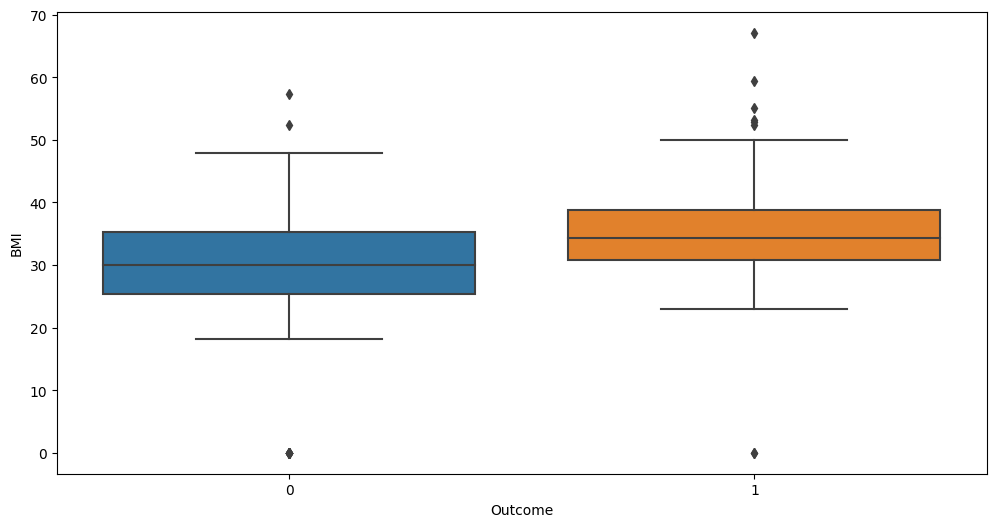

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Outcome',y = 'BMI',data=data)

<Axes: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

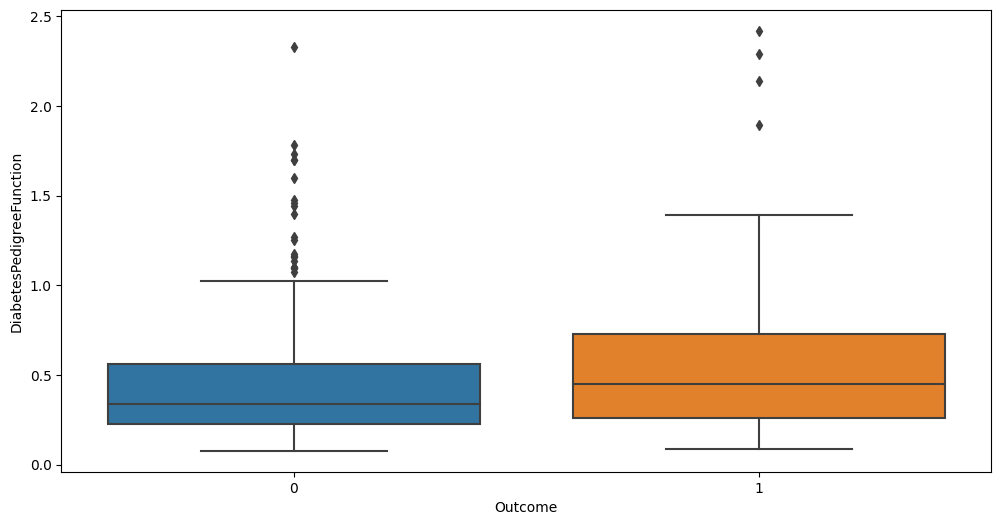

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Outcome',y = 'DiabetesPedigreeFunction',data=data)

<Axes: xlabel='Age', ylabel='Outcome'>

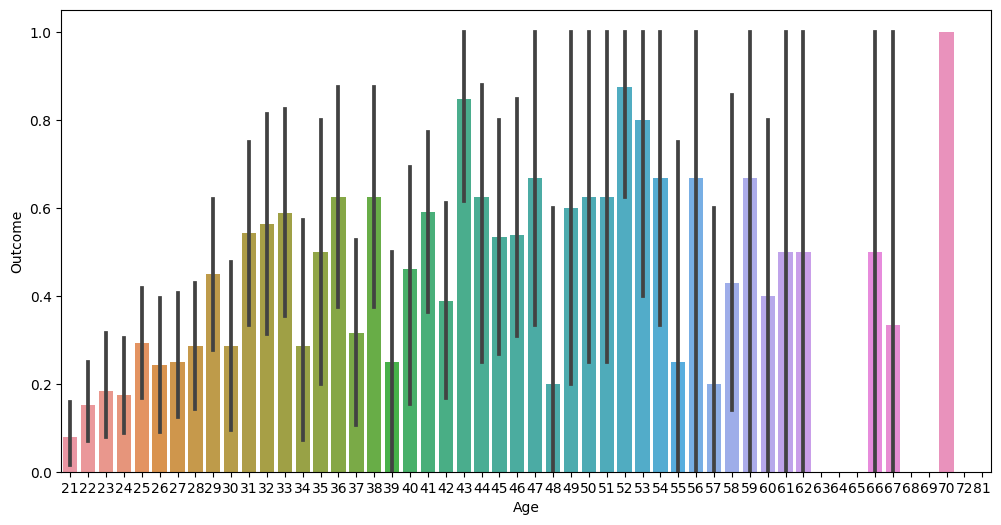

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Age',y = 'Outcome',data=data)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbb1ab20520>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbb1ab20940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbb1ab20280>,
 'medians': [<matplotlib.lines.Line2D at 0x7fbb1ab20e80>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbb1ab2c160>,
 'means': []}

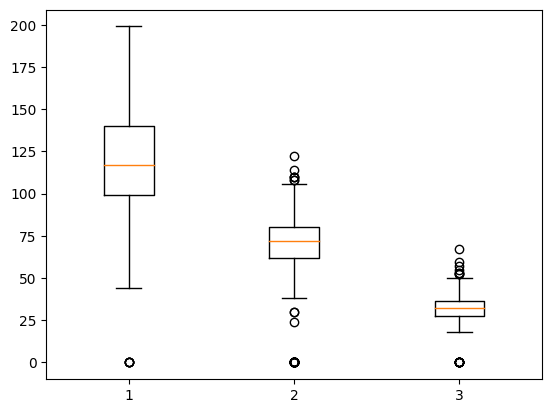

In [ ]:
plt.boxplot([data['Glucose'],data['BloodPressure'],data['BMI']])

<Axes: >

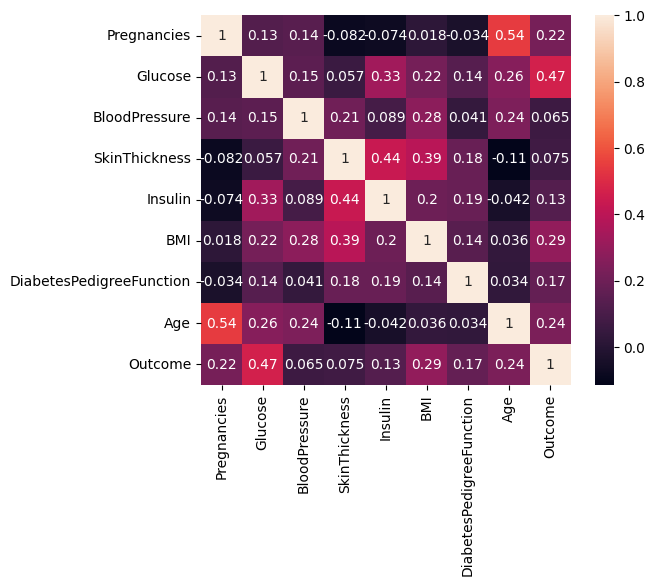

In [ ]:
import seaborn as SkinThickness

sns.heatmap(data.corr(), annot=True, square=True)

In [ ]:
# 데이터 전처리
# 'Glucose'와 'BMI'가 0인 행을 삭제함.

In [ ]:
print(data[data['Glucose']==0].index, data[data['BMI']==0].index, data[data['BloodPressure']==0].index)

Int64Index([75, 182, 342, 349, 502], dtype='int64') Int64Index([9, 49, 60, 81, 145, 371, 426, 494, 522, 684, 706], dtype='int64') Int64Index([  7,  15,  49,  60,  78,  81, 172, 193, 222, 261, 266, 269, 300,
            332, 336, 347, 357, 426, 430, 435, 453, 468, 484, 494, 522, 533,
            535, 589, 601, 604, 619, 643, 697, 703, 706],
           dtype='int64')


In [ ]:
idx = set([75, 182, 342, 349, 502,
           9, 49, 60, 81, 145, 371, 426, 494, 522, 684, 706,
           7,  15,  49,  60,  78,  81, 172, 193, 222, 261, 266, 269, 300, 332, 336, 347, 357, 426, 430, 435, 453, 468, 484, 494, 522, 533, 535, 589, 601, 604, 619, 643, 697, 703, 706])
print(idx)
print(len(idx))

{643, 261, 7, 9, 522, 266, 269, 15, 145, 533, 535, 426, 684, 172, 300, 430, 49, 435, 182, 697, 60, 703, 193, 706, 453, 75, 332, 589, 78, 336, 81, 468, 342, 601, 347, 604, 349, 222, 484, 357, 619, 494, 371, 502}
44


In [ ]:
data_drp = data.drop(index=idx)

print(data.shape, data_drp.shape)

(768, 9) (724, 9)


- IQR 이상치 처리

In [ ]:
data_IQR = data_drp

for i in range(8):
  print(data_IQR.shape)
  count_q1 = np.percentile(data_IQR.iloc[:,i], 25)
  count_q3 = np.percentile(data_IQR.iloc[:,i], 75)
  count_IQR = count_q3 - count_q1

  data_IQR = data_IQR[
    (data_IQR.iloc[:,i] >= (count_q1 - (1.5*count_IQR))) &
    (data_IQR.iloc[:,i] <= (count_q3 + (1.5*count_IQR)))]

  print(data_IQR.shape)

(724, 9)
(720, 9)
(720, 9)
(720, 9)
(720, 9)
(706, 9)
(706, 9)
(705, 9)
(705, 9)
(678, 9)
(678, 9)
(671, 9)
(671, 9)
(646, 9)
(646, 9)
(633, 9)


# Logistic Regression

In [ ]:
# train-test-split

In [ ]:
X = data_IQR.drop(columns=['Outcome'])
y = data_IQR['Outcome']
print(X.shape, y.shape)

(633, 8) (633,)


In [ ]:
# Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

scores = []

for i in range(15):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=413)

  model = LogisticRegression(max_iter=5000)  # GD를 반복해서 최적의 값 선정.
  model.fit(X_train, y_train)

  # score = model.predict_proba(X_test)    # 0과 1에 대한 확률값 모두 산출됨.
  score = model.score(X_test, y_test)
  scores.append(score)

print(scores)

[0.7716535433070866, 0.7716535433070866, 0.7716535433070866, 0.7716535433070866, 0.7716535433070866, 0.7716535433070866, 0.7716535433070866, 0.7716535433070866, 0.7716535433070866, 0.7716535433070866, 0.7716535433070866, 0.7716535433070866, 0.7716535433070866, 0.7716535433070866, 0.7716535433070866]


# Decision Tree 결정 트리

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
print('accuracy : {:.2f}'.format(DT.score(X_test, y_test)))

accuracy : 0.80


[Text(0.571954083588957, 0.9642857142857143, 'x[1] <= 146.5\ngini = 0.431\nsamples = 506\nvalue = [347, 159]'),
 Text(0.272742523006135, 0.8928571428571429, 'x[7] <= 30.5\ngini = 0.336\nsamples = 416\nvalue = [327, 89]'),
 Text(0.1549079754601227, 0.8214285714285714, 'x[0] <= 6.5\ngini = 0.216\nsamples = 252\nvalue = [221, 31]'),
 Text(0.14263803680981596, 0.75, 'x[5] <= 30.95\ngini = 0.2\nsamples = 249\nvalue = [221, 28]'),
 Text(0.06134969325153374, 0.6785714285714286, 'x[1] <= 116.5\ngini = 0.075\nsamples = 129\nvalue = [124, 5]'),
 Text(0.049079754601226995, 0.6071428571428571, 'gini = 0.0\nsamples = 95\nvalue = [95, 0]'),
 Text(0.0736196319018405, 0.6071428571428571, 'x[0] <= 2.5\ngini = 0.251\nsamples = 34\nvalue = [29, 5]'),
 Text(0.049079754601226995, 0.5357142857142857, 'x[3] <= 6.5\ngini = 0.077\nsamples = 25\nvalue = [24, 1]'),
 Text(0.03680981595092025, 0.4642857142857143, 'x[7] <= 25.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.024539877300613498, 0.3928571428571

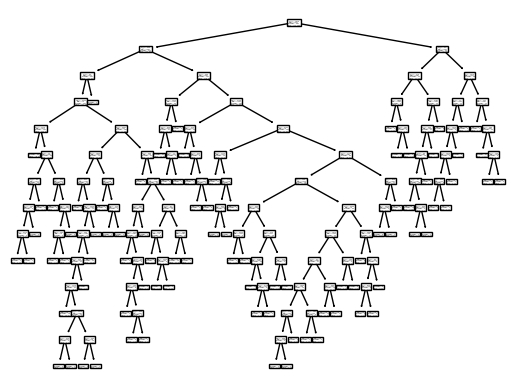

In [ ]:
from sklearn import tree

tree.plot_tree(DT)

In [ ]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
y.value_counts()

0    435
1    198
Name: Outcome, dtype: int64

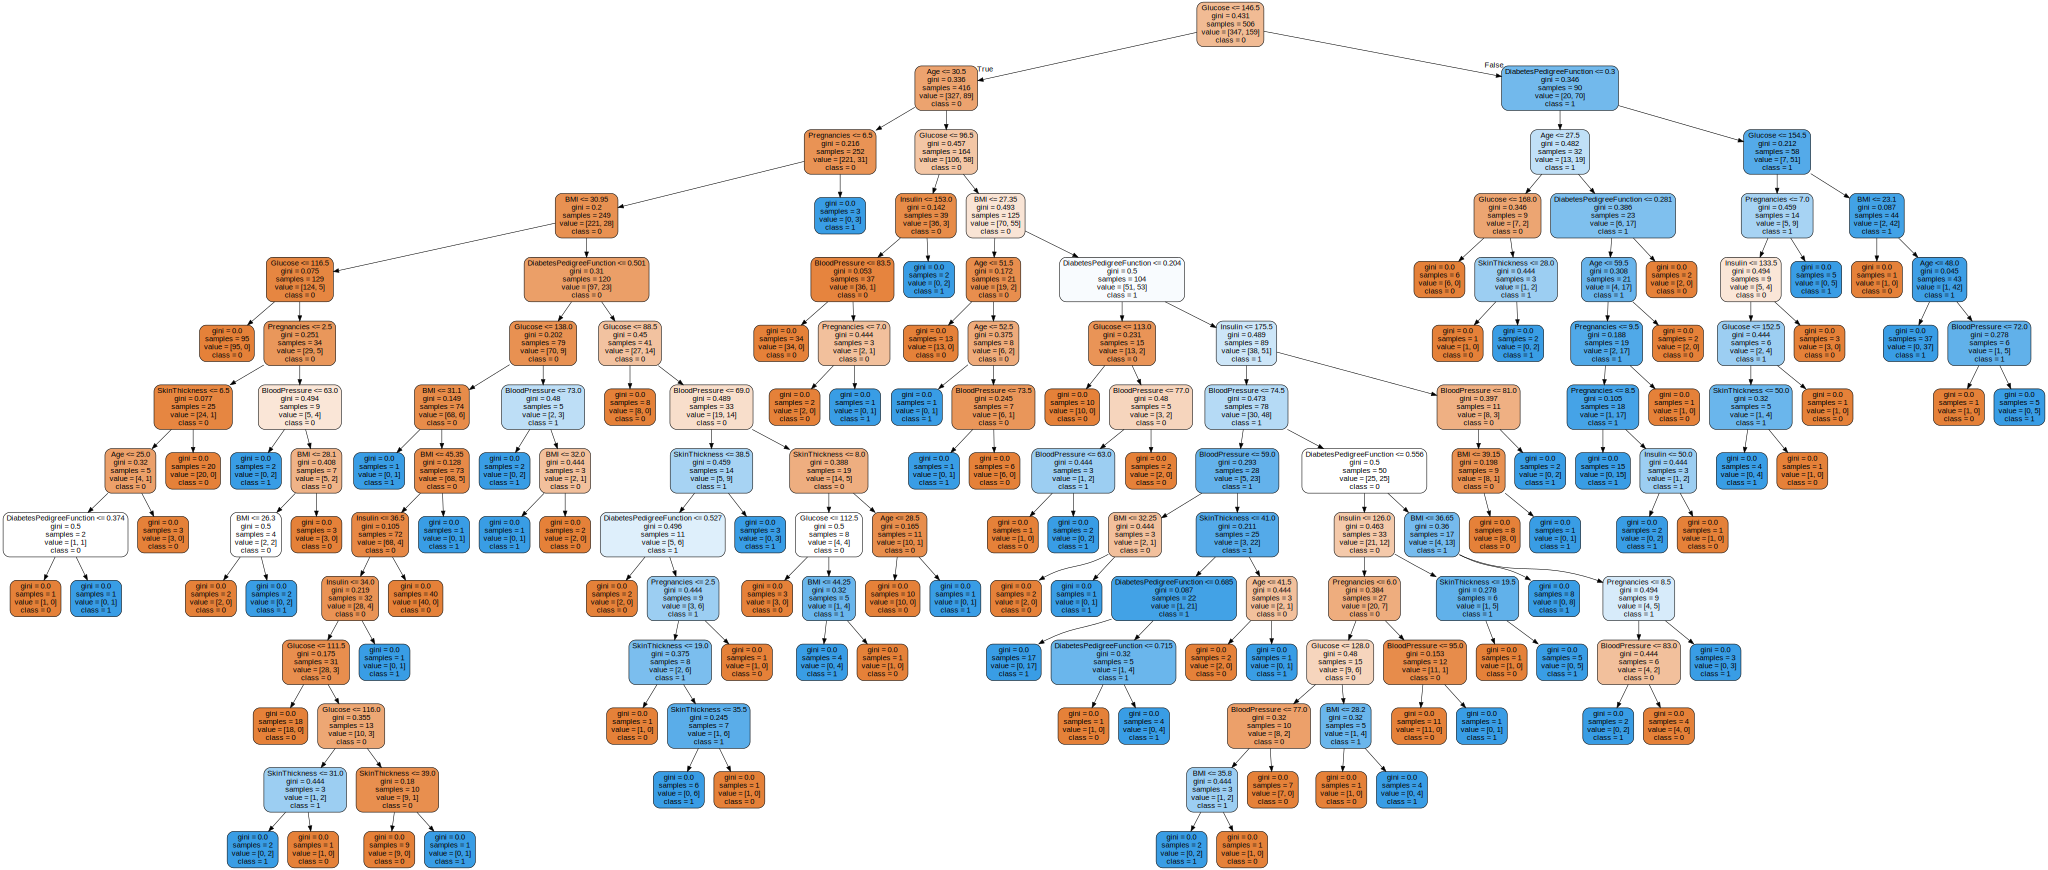

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(DT,
                out_file = 'diabetes.dot',
                feature_names = X.columns,
                class_names = ['0','1'],
                rounded=True,
                filled=True)
Source.from_file('diabetes.dot')

- feature importance

Pregnancies : 0.076
Glucose : 0.339
BloodPressure : 0.118
SkinThickness : 0.072
Insulin : 0.066
BMI : 0.127
DiabetesPedigreeFunction : 0.099
Age : 0.105


<Axes: >

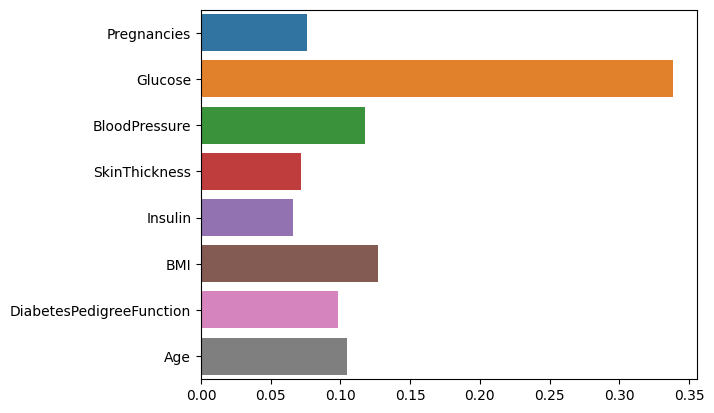

In [ ]:
import seaborn as sns

for name, value in zip(X.columns, DT.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

sns.barplot(x = DT.feature_importances_, y = X.columns)

# 당뇨병 발병 여부는 Glucose로 분류하면 되겠다!

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, DT.predict(X_test))

array([[72, 16],
       [10, 29]])

In [ ]:
for i in range(1,20):
  tree = DecisionTreeClassifier(max_depth=i, random_state=413)
  tree.fit(X_train, y_train)
  y_pred = tree.predict(X_test)

  print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
  print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_pred)))

In [ ]:
# hyperparameter : max_depth를 설정하고 DT
tree = DecisionTreeClassifier(max_depth=10, random_state=413)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_pred)))

Accuracy on training set: 0.970
Accuracy on test set: 1.000


In [ ]:
# 결정 트리 분석
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=['0', '1'],
                feature_names=X.columns, impurity=False, filled=True)

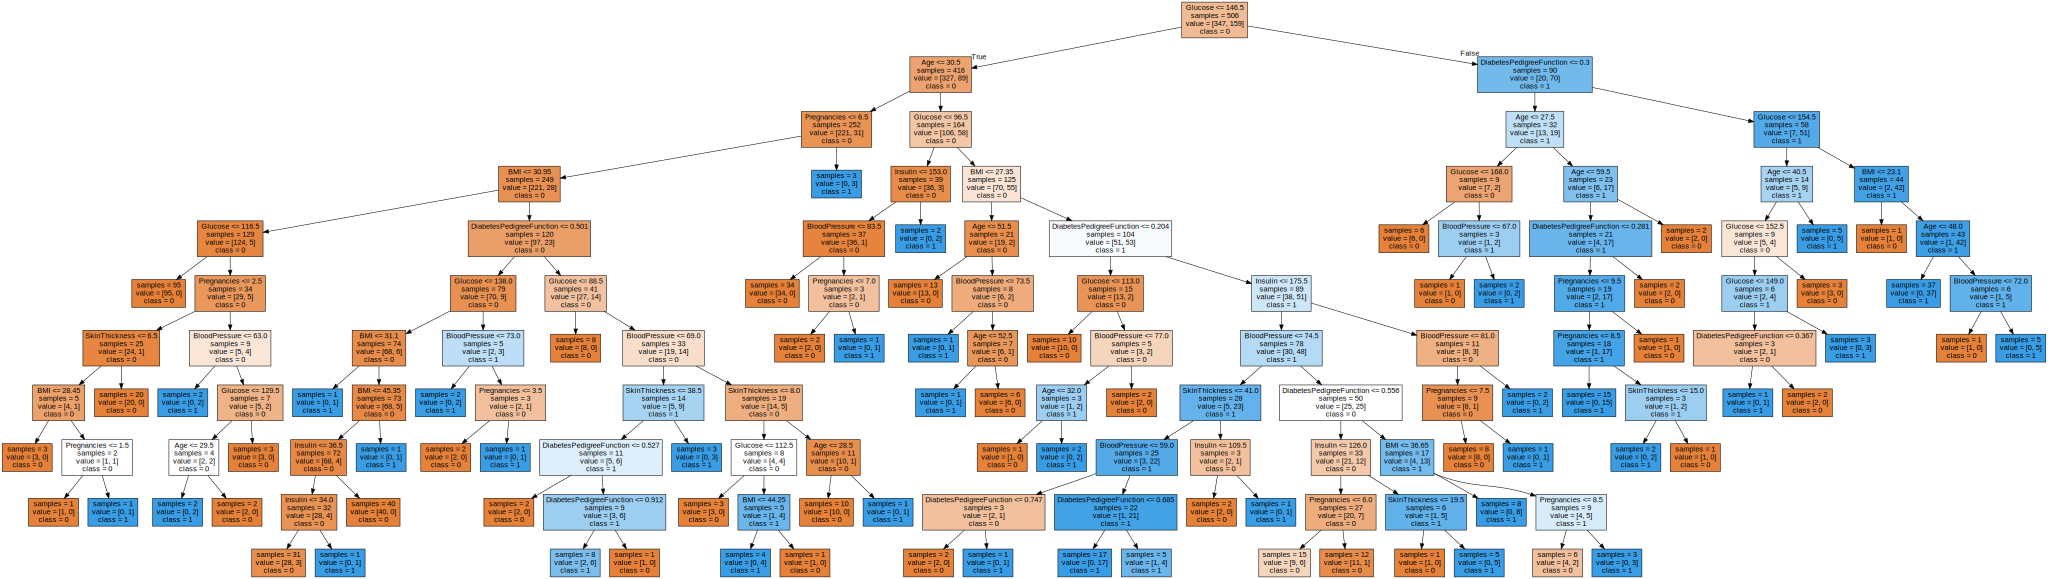

In [ ]:
import graphviz

with open('tree.dot') as f:
  dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [ ]:
def plot_feature_importances(model):
  n_features = X_train.shape[1]
  plt.barh(np.arange(n_features), model.feature_importances_, align='center')  # 수평막대. bar horizontal (y, width)
  plt.yticks(np.arange(n_features), X_train.columns)
  plt.xlabel('Feature importance')
  plt.ylabel('Feature')
  plt.ylim(-1, n_features)

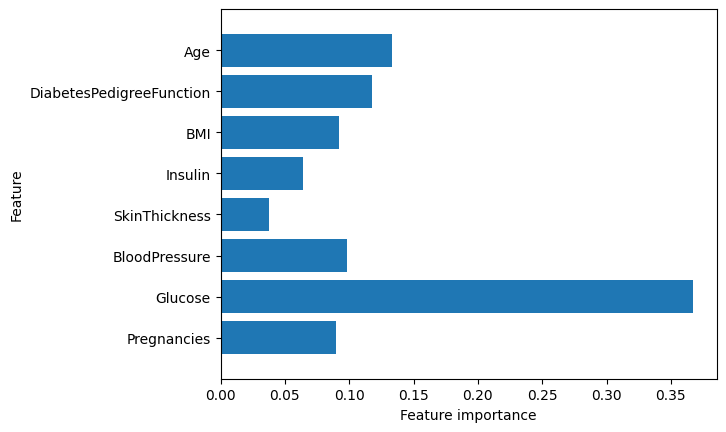

In [ ]:
plot_feature_importances(tree)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, tree.predict(X_test))

array([[74, 14],
       [11, 28]])

In [ ]:
from sklearn.metrics import classification_report
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.87      0.84      0.86        88
     class 1       0.67      0.72      0.69        39

    accuracy                           0.80       127
   macro avg       0.77      0.78      0.77       127
weighted avg       0.81      0.80      0.81       127



In [ ]:
# shap value : 실제값과 예측값의 차이. 특정 관측치의 실제 예측치와 평균 예측치의 평균적인 차이를 의미.

# !pip install shap

# import skimage
# skimage.__version__

# !pip install --upgrade scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 7.3 MB/s eta 0:00:00


In [ ]:
import shap
explainer = shap.TreeExplainer(tree)   # Tree model shap value 객체 지정정
shap_values = explainer.shap_values(X_test)

In [ ]:
type(shap_values)

list

In [ ]:
shap_values

[array([[ 1.19490717e-02,  2.58000103e-01, -3.16792911e-02, ...,
         -2.23378510e-02,  5.95415362e-03,  5.99055302e-02],
        [-2.27344593e-02, -7.09409610e-02, -1.85907560e-01, ...,
         -5.88963392e-02, -2.02904412e-02, -2.47733632e-01],
        [-1.38022509e-02, -5.32348896e-01,  3.03774543e-02, ...,
          1.01867267e-01, -1.00874080e-01, -1.63922559e-01],
        ...,
        [ 1.52672754e-04, -3.31633977e-01, -4.63955815e-02, ...,
         -4.30428233e-02, -6.84550272e-02, -1.21425020e-01],
        [ 1.33361319e-03,  5.36190946e-02,  1.80389193e-02, ...,
          1.10402733e-01,  7.57250286e-02,  4.32056569e-02],
        [-9.51310400e-06,  1.77485248e-01, -1.09789956e-02, ...,
         -8.55222993e-03,  9.34984800e-02,  7.80166134e-02]]),
 array([[-1.19490717e-02, -2.58000103e-01,  3.16792911e-02, ...,
          2.23378510e-02, -5.95415362e-03, -5.99055302e-02],
        [ 2.27344593e-02,  7.09409610e-02,  1.85907560e-01, ...,
          5.88963392e-02,  2.02904412e

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


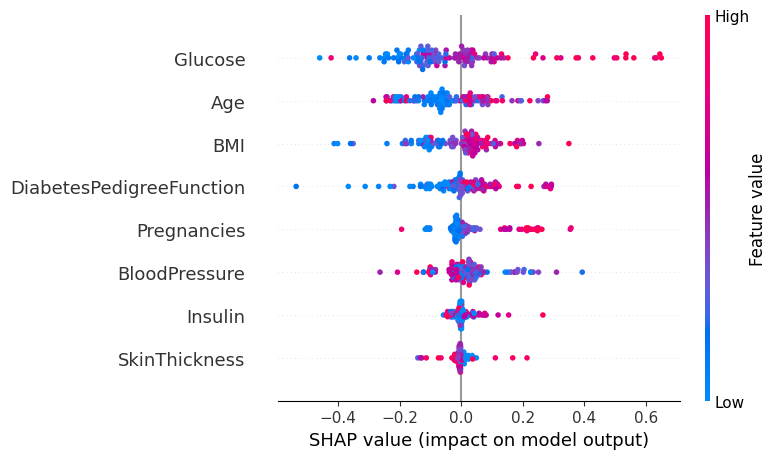

In [ ]:
shap.summary_plot(shap_values[1], X_test)

# "Glucose" 값이 높을 때 예측값을 증가시켰고, 값이 낮을 때 예측값을 감소시켰다.
# -> "Glucose"는 target과 양의 상관관계.

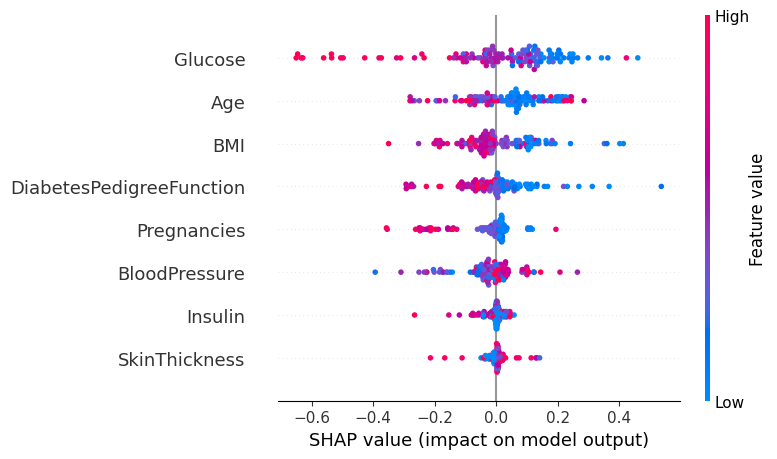

In [ ]:
shap.summary_plot(shap_values[0], X_test)

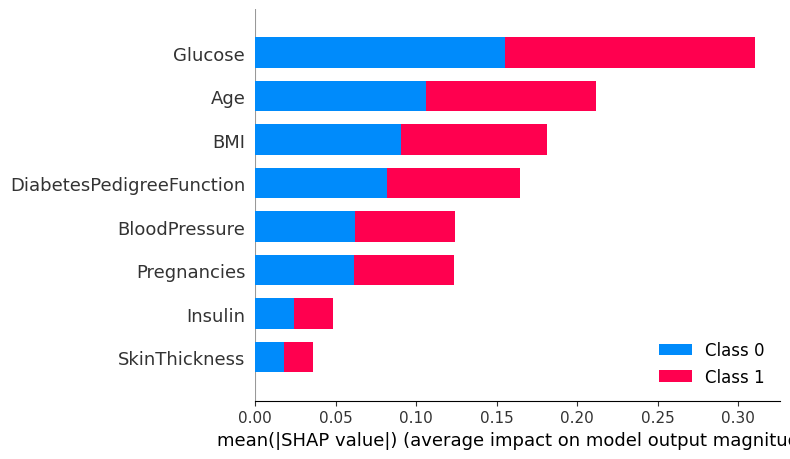

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

# Random Forest

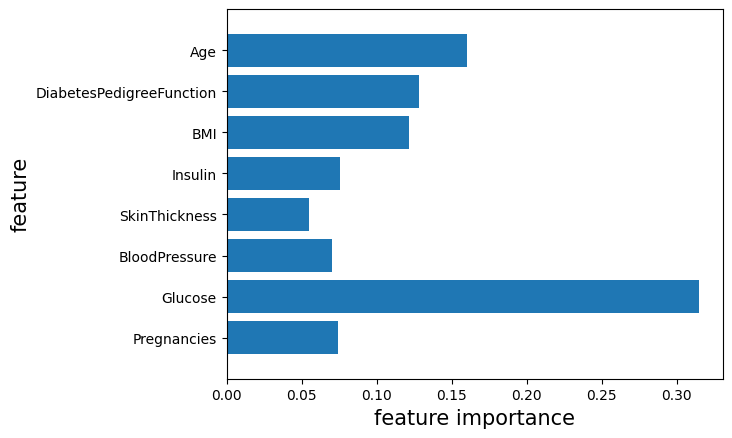

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_feature = X.shape[1]
index = np.arange(n_feature)

forest = RandomForestClassifier(n_estimators=10, n_jobs=-1)
forest.fit(X_train, y_train)
plt.barh(index, forest.feature_importances_, align='center')
plt.yticks(index, X.columns)
plt.ylim(-1, n_feature)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, forest.predict(X_test))

array([[74, 14],
       [17, 22]])

In [ ]:
from sklearn.metrics import classification_report
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.87      0.84      0.86        88
     class 1       0.67      0.72      0.69        39

    accuracy                           0.80       127
   macro avg       0.77      0.78      0.77       127
weighted avg       0.81      0.80      0.81       127



In [ ]:
import shap
explainer = shap.TreeExplainer(forest)
shap_values = explainer.shap_values(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


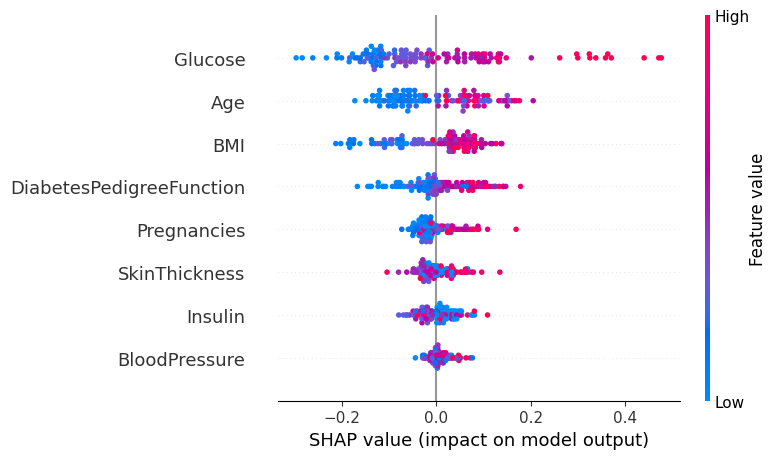

In [ ]:
shap.summary_plot(shap_values[1], X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('AUROC: ', roc_auc)

AUROC:  0.69245337995338


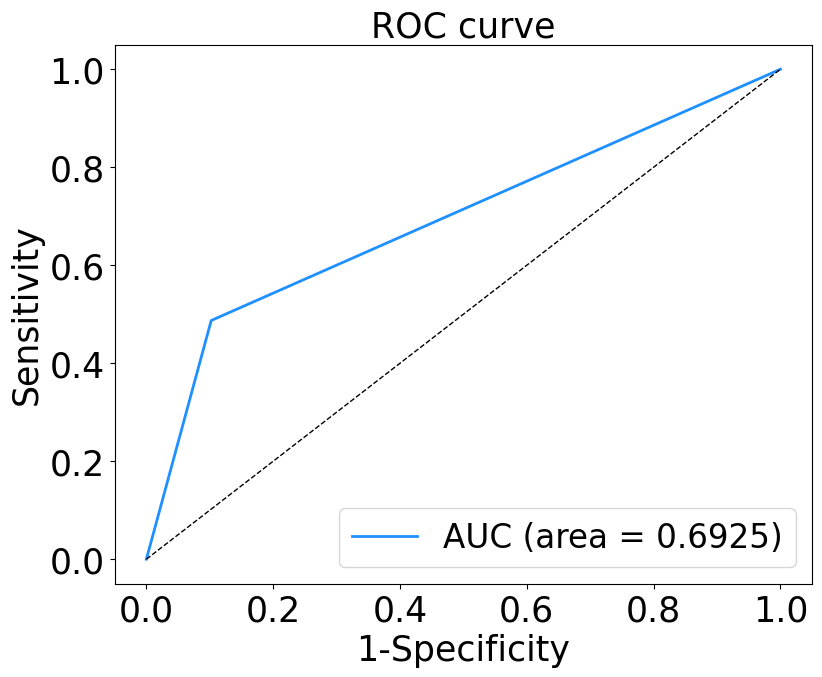

In [ ]:
plt.figure(figsize=[9,7])
plt.plot(fpr, tpr, color='dodgerblue', lw=2, label='AUC (area = %0.4f)' % roc_auc)
plt.plot([0,1], [0,1], color='black', lw=1, linestyle='--')
plt.xlim([-.05, 1.05])
plt.ylim([-.05, 1.05])
plt.xlabel('1-Specificity', fontsize=25)  # FPR
plt.ylabel('Sensitivity', fontsize=25)
plt.title('ROC curve', fontsize=25)
plt.legend(loc='lower right', fontsize=23.5)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred = tree.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('AUROC: ', roc_auc)

AUROC:  0.7794289044289046


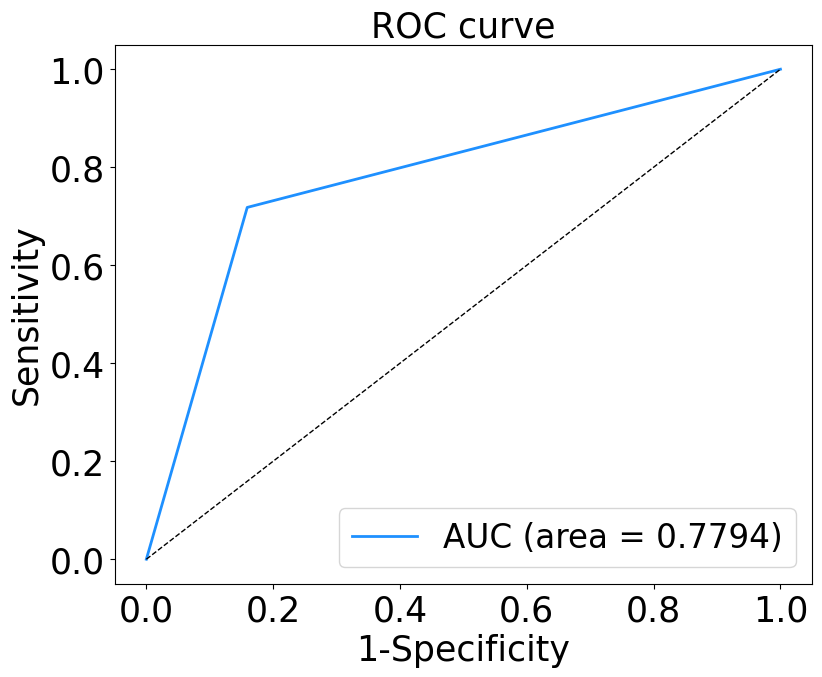

In [ ]:
plt.figure(figsize=[9,7])
plt.plot(fpr, tpr, color='dodgerblue', lw=2, label='AUC (area = %0.4f)' % roc_auc)
plt.plot([0,1], [0,1], color='black', lw=1, linestyle='--')
plt.xlim([-.05, 1.05])
plt.ylim([-.05, 1.05])
plt.xlabel('1-Specificity', fontsize=25)  # FPR
plt.ylabel('Sensitivity', fontsize=25)
plt.title('ROC curve', fontsize=25)
plt.legend(loc='lower right', fontsize=23.5)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred = forest.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('AUROC: ', roc_auc)

AUROC:  0.7025058275058275


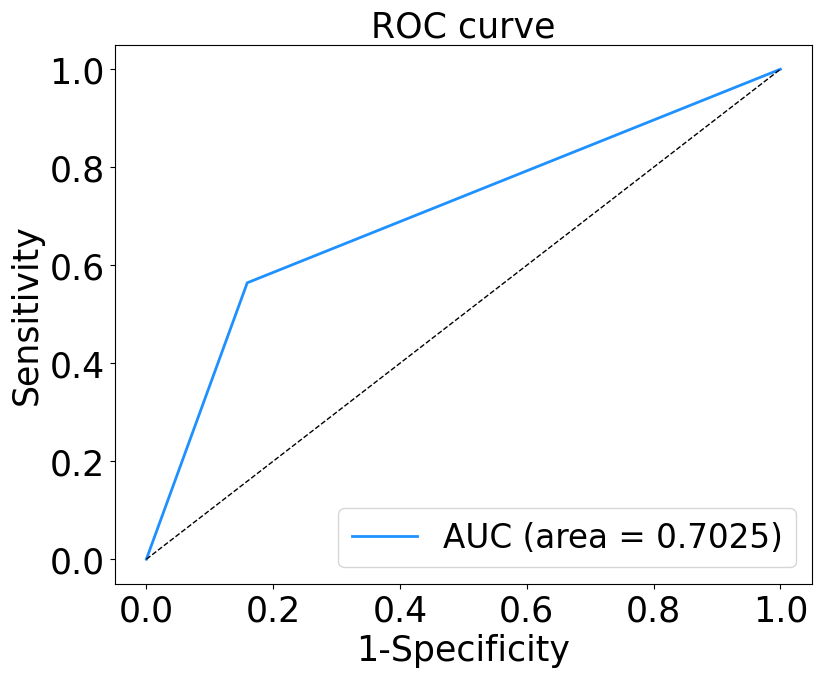

In [ ]:
plt.figure(figsize=[9,7])
plt.plot(fpr, tpr, color='dodgerblue', lw=2, label='AUC (area = %0.4f)' % roc_auc)
plt.plot([0,1], [0,1], color='black', lw=1, linestyle='--')
plt.xlim([-.05, 1.05])
plt.ylim([-.05, 1.05])
plt.xlabel('1-Specificity', fontsize=25)  # FPR
plt.ylabel('Sensitivity', fontsize=25)
plt.title('ROC curve', fontsize=25)
plt.legend(loc='lower right', fontsize=23.5)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()